# Linear and Logistic Regression

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Importing the dataset

In [2]:
dataset=pd.read_csv("HRV.csv")

## Dataset Preprocessing

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4234 non-null   int64  
 1   age            4234 non-null   int64  
 2   currentSmoker  4234 non-null   int64  
 3   totChol        4184 non-null   float64
 4   sysBP          4234 non-null   float64
 5   diaBP          4234 non-null   float64
 6   BMI            4215 non-null   float64
 7   heartRate      4233 non-null   float64
 8   glucose        3847 non-null   float64
 9   TenYearCHD     4234 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 330.9 KB


In [4]:
dataset.isnull()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4229,False,False,False,False,False,False,False,False,False,False
4230,False,False,False,False,False,False,False,False,False,False
4231,False,False,False,False,False,False,False,False,False,False
4232,False,False,False,False,False,False,False,False,True,False


In [5]:
dataset.describe()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4234.000000,4234.000000,4234.000000,4184.000000,4234.000000,4234.000000,4215.000000,4233.000000,3847.000000,4234.000000
mean,0.428909,49.583845,0.494095,236.723231,132.347780,82.886042,25.800624,75.882825,81.976085,0.151630
std,0.494979,8.575050,0.500024,44.608268,22.046338,11.911857,4.081183,12.031365,23.966195,0.358704
min,0.000000,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,263.000000,144.000000,89.500000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
totalcholesterolmean=dataset.totChol.mean()

In [7]:
BMImean=dataset.BMI.mean()

In [8]:
heartRatemean=dataset.heartRate.mean()

In [9]:
glucosemean=dataset.glucose.mean()

In [10]:
dataset.totChol.fillna(totalcholesterolmean, inplace=True)

In [11]:
dataset.BMI.fillna(BMImean, inplace=True)

In [12]:
dataset.heartRate.fillna(heartRatemean, inplace=True)

In [13]:
dataset.glucose.fillna(glucosemean, inplace=True)

In [14]:
dataset.isnull().sum()

male             0
age              0
currentSmoker    0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64

## A. Linear Regression - Create a model to predict the cholestrol level of a person

In [15]:
dataset.columns

Index(['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Create independent and dependent variables to predict 

In [16]:
x=dataset[['male','age','currentSmoker','sysBP','diaBP','BMI','heartRate','glucose','TenYearCHD']]

In [17]:
y=dataset[['totChol']]

## Splitting the dataset into the Training set and Test set

In [18]:
from sklearn.model_selection import train_test_split


In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=0)


In [39]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
#.fit to train your model
regressor.fit(x_train.values,y_train)

LinearRegression()

In [40]:
print(f"Coefficient: {regressor.coef_}")

Coefficient: [[-7.69389556  1.17839024  2.23080452  0.0846499   0.25580816  0.62710148
   0.14239754  0.03052255  0.63724312]]


In [41]:
y_pred=regressor.predict(x_test.values)


In [42]:
from sklearn.metrics import mean_squared_error, r2_score
import math

## Training the Linear Regression model 

## Model performance check- R Square and RMSE score

In [43]:
print(F"RMSE: {math.sqrt(mean_squared_error(y_test,y_pred)):.2f}")


RMSE: 45.21


In [44]:
print(f"R-square: {r2_score(y_test,y_pred):.2f}")


R-square: 0.06


## Predicting new results where the actual results are given
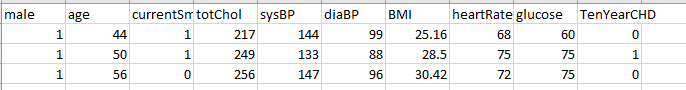

In [45]:
# case 1 actual 217
regressor.predict([[1,44,1,144,99,25.16,68,60,0]])

array([[229.4528633]])

In [46]:
# case 2 actual 249
regressor.predict([[1,50,1,133,88,28.5,75,75,1]])

array([[236.96454907]])

In [47]:
# case 3 actual 256
regressor.predict([[1,56,0,147,96,30.42,72,75,0]])

array([[245.17524904]])

## B. Logistic Regression - Create a model to predict the 10 year risk of coronary heart disease CHD of a person

### Create independent and dependent variables to predict

In [56]:
x=dataset[['male','age','currentSmoker','totChol','sysBP','diaBP','BMI','heartRate','glucose']]
y=dataset[['TenYearCHD']]

## Splitting the dataset into the Training set and Test set

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=0)

## Training the Logistic Regression model 

In [58]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train.values,y_train)

C:\Users\jguth\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jguth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
y_pred=classifier.predict(x_test.values)

### Model Performance check using Confusion matrix, Confusion matrix display and classification report

In [64]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[1179    3]
 [ 208    8]]


In [65]:
y_test

,TenYearCHD
3554,0
410,0
3868,1
1487,0
840,1
...,...
3829,1
2527,0
349,0
2100,0


In [66]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
classifier.classes_

array([0, 1], dtype=int64)

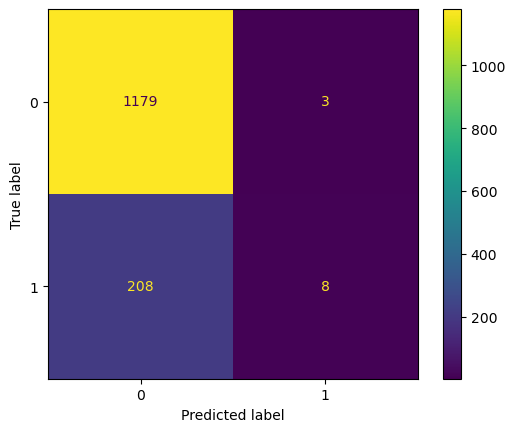

In [68]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=classifier.classes_)
disp.plot()
plt.show()

### Discuss the results

1179 people still had a risk for   coronary heart disease after 10 years

## Predicting new results where the actual results are given
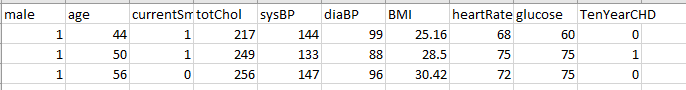

In [70]:
classifier.predict([[1,44,1,217,144,99,25.16,68,60]])

array([0], dtype=int64)

In [71]:
classifier.predict([[1,50,1,249,133,88,28.5,75,75]])

array([0], dtype=int64)

In [72]:
classifier.predict([[1,56,0,256,147,96,30.42,72,75]])

array([0], dtype=int64)

### Summary

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1182
           1       0.73      0.04      0.07       216

    accuracy                           0.85      1398
   macro avg       0.79      0.52      0.49      1398
weighted avg       0.83      0.85      0.79      1398



It is not terribly accurate. only 2 of the 3 predictions were correct. However, in terms of the work itself, my teammates helped me quite a bit. Good work, less good results, though that may be chalked up to poor luck on my end